In [31]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [59]:
weather = pd.read_csv('../input/weather.csv')

In [60]:
weather.shape

(2944, 22)

In [61]:
weather.head()

,Station,Date,Tmax,Tmin,Tavg,Depart,DewPoint,WetBulb,Heat,Cool,...,CodeSum,Depth,Water1,SnowFall,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
0,1,2007-05-01,83,50,67,14,51,56,0,2,...,,0,M,0.0,0.00,29.10,29.82,1.7,27,9.2
1,2,2007-05-01,84,52,68,M,51,57,0,3,...,,M,M,M,0.00,29.18,29.82,2.7,25,9.6
2,1,2007-05-02,59,42,51,-3,42,47,14,0,...,BR,0,M,0.0,0.00,29.38,30.09,13.0,4,13.4
3,2,2007-05-02,60,43,52,M,42,47,13,0,...,BR HZ,M,M,M,0.00,29.44,30.08,13.3,2,13.4
4,1,2007-05-03,66,46,56,2,40,48,9,0,...,,0,M,0.0,0.00,29.39,30.12,11.7,7,11.9


In [62]:
weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2944 entries, 0 to 2943
Data columns (total 22 columns):
Station        2944 non-null int64
Date           2944 non-null object
Tmax           2944 non-null int64
Tmin           2944 non-null int64
Tavg           2944 non-null object
Depart         2944 non-null object
DewPoint       2944 non-null int64
WetBulb        2944 non-null object
Heat           2944 non-null object
Cool           2944 non-null object
Sunrise        2944 non-null object
Sunset         2944 non-null object
CodeSum        2944 non-null object
Depth          2944 non-null object
Water1         2944 non-null object
SnowFall       2944 non-null object
PrecipTotal    2944 non-null object
StnPressure    2944 non-null object
SeaLevel       2944 non-null object
ResultSpeed    2944 non-null float64
ResultDir      2944 non-null int64
AvgSpeed       2944 non-null object
dtypes: float64(1), int64(5), object(16)
memory usage: 506.1+ KB


In [63]:
weather.Date = pd.to_datetime(weather.Date, infer_datetime_format=True)

In [64]:
weather.set_index(['Date'], inplace=True)

In [65]:
weather.drop(['Water1', 'Depart', 'Depth', 'SnowFall'], axis=1, inplace=True)

In [66]:
weather[weather.values=='M'].drop_duplicates().shape

(26, 17)

In [67]:
weather[weather.values=='M'].drop_duplicates()

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,
2007-05-04,2,78,51,M,42,50,M,M,-,-,,0.00,29.36,30.04,10.1,7,10.4
2007-06-13,2,86,68,77,53,62,0,12,-,-,,0.00,M,M,7.0,5,M
2007-06-28,2,73,61,67,56,61,0,2,-,-,,M,29.43,30.07,12.2,2,13.3
2007-06-29,2,71,56,64,56,60,1,0,-,-,,M,29.47,30.11,7.4,2,8.2
2008-07-08,2,86,46,M,68,71,M,M,-,-,TS RA,0.28,29.16,29.80,7.4,24,8.3
2008-10-01,2,62,46,M,41,47,M,M,-,-,,0.00,29.30,29.96,10.9,33,11.0
2009-06-18,1,80,61,71,63,67,0,6,0416,1929,RA BR,0.12,29.08,M,6.7,16,7.9
2009-06-26,1,86,69,78,60,M,0,13,0418,1931,,0.00,M,29.85,6.4,4,8.2
2009-09-07,1,77,59,68,59,62,0,3,0523,1817,BR,0.00,29.39,M,5.8,3,4.0


In [68]:
weather.Tavg.replace("M", "0", inplace=True)

In [69]:
weather.Tavg = weather.Tavg.astype(int)

In [70]:
#weather.loc[weather.Tavg == 0, 
            #'Tavg'] = weather[weather.Tavg == 0].apply(lambda row: 
                                #(row['Tmax'] + row['Tmin'])/2, 1)

In [71]:
weather['Tavg'] = weather.apply(lambda row: 
                                (row['Tmax'] + row['Tmin'])/2 
                                if row['Tavg'] == 0 
                                else row['Tavg'], 1)

In [72]:
weather.head(10)

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,
2007-05-01,1,83,50,67.0,51,56,0,2,0448,1849,,0.00,29.10,29.82,1.7,27,9.2
2007-05-01,2,84,52,68.0,51,57,0,3,-,-,,0.00,29.18,29.82,2.7,25,9.6
2007-05-02,1,59,42,51.0,42,47,14,0,0447,1850,BR,0.00,29.38,30.09,13.0,4,13.4
2007-05-02,2,60,43,52.0,42,47,13,0,-,-,BR HZ,0.00,29.44,30.08,13.3,2,13.4
2007-05-03,1,66,46,56.0,40,48,9,0,0446,1851,,0.00,29.39,30.12,11.7,7,11.9
2007-05-03,2,67,48,58.0,40,50,7,0,-,-,HZ,0.00,29.46,30.12,12.9,6,13.2
2007-05-04,1,66,49,58.0,41,50,7,0,0444,1852,RA,T,29.31,30.05,10.4,8,10.8
2007-05-04,2,78,51,64.5,42,50,M,M,-,-,,0.00,29.36,30.04,10.1,7,10.4
2007-05-05,1,66,53,60.0,38,49,5,0,0443,1853,,T,29.40,30.10,11.7,7,12.0


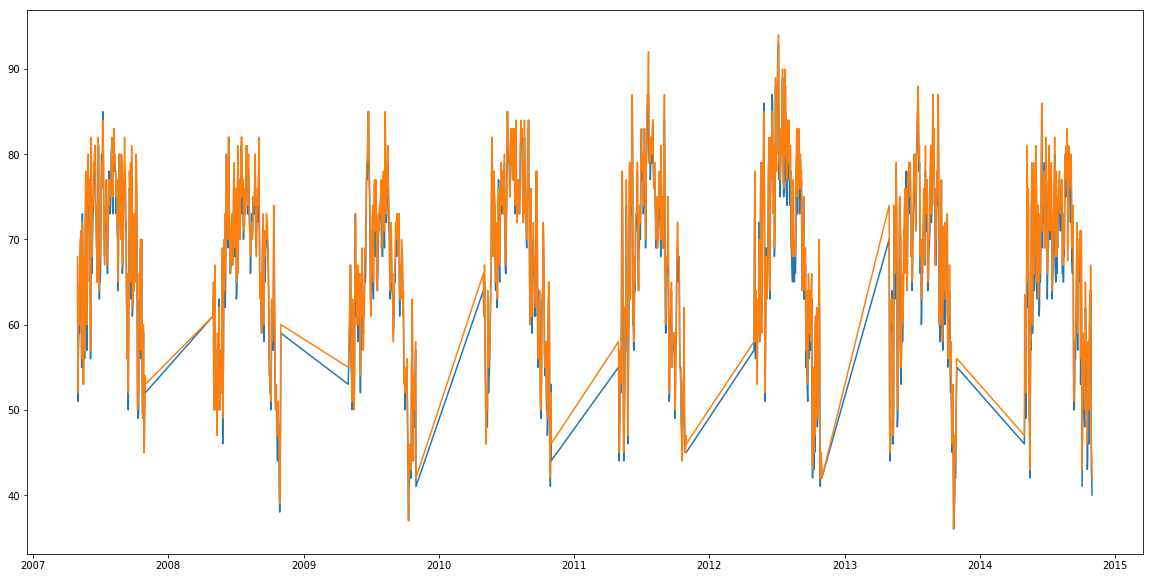

In [73]:
plt.figure(figsize=(20,10))

plt.plot(weather[weather['Station']==1]['Tavg'])
plt.plot(weather[weather['Station']==2]['Tavg'])

In [17]:
#weather[weather['Station']==1]['Tavg'].value_counts()

In [18]:
weather.dtypes

Station          int64
Tmax             int64
Tmin             int64
Tavg           float64
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
Sunrise         object
Sunset          object
CodeSum         object
PrecipTotal     object
StnPressure     object
SeaLevel        object
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [19]:
weather.head()

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,
2007-05-01,1,83,50,67.0,51,56,0,2,0448,1849,,0.00,29.10,29.82,1.7,27,9.2
2007-05-01,2,84,52,68.0,51,57,0,3,-,-,,0.00,29.18,29.82,2.7,25,9.6
2007-05-02,1,59,42,51.0,42,47,14,0,0447,1850,BR,0.00,29.38,30.09,13.0,4,13.4
2007-05-02,2,60,43,52.0,42,47,13,0,-,-,BR HZ,0.00,29.44,30.08,13.3,2,13.4
2007-05-03,1,66,46,56.0,40,48,9,0,0446,1851,,0.00,29.39,30.12,11.7,7,11.9


In [20]:
weather.drop(['CodeSum'], axis=1, inplace=True)

In [123]:
weather1 = weather[weather.Station==1]

In [157]:
weather[weather.values=="M"].drop_duplicates()

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,
2007-05-04,2,78,51,64.5,42,50,M,M,-,-,,0.00,29.36,30.040000,10.1,7,10.4
2007-06-13,2,86,68,77.0,53,62,0,12,-,-,,0.00,M,29.886634,7.0,5,M
2007-06-28,2,73,61,67.0,56,61,0,2,-,-,,M,29.43,30.070000,12.2,2,13.3
2007-06-29,2,71,56,64.0,56,60,1,0,-,-,,M,29.47,30.110000,7.4,2,8.2
2008-07-08,2,86,46,66.0,68,71,M,M,-,-,TS RA,0.28,29.16,29.800000,7.4,24,8.3
2008-10-01,2,62,46,54.0,41,47,M,M,-,-,,0.00,29.30,29.960000,10.9,33,11.0
2011-07-22,2,100,71,85.5,70,74,M,M,-,-,TS TSRA BR,0.14,29.23,29.860000,3.8,10,8.2
2011-09-14,2,60,48,54.0,45,51,11,0,-,-,RA BR HZ FU,T,29.47,29.886634,6.0,32,M
2012-08-22,2,84,72,78.0,51,61,M,M,-,-,,0.00,29.39,29.886634,4.7,19,M


In [ ]:
weather.loc['2009-06-26','WetBulb'] = 67

In [79]:
weather.loc['2009-06-18', 'SeaLevel'] = 29.79

In [84]:
weather.loc['2009-06-26', 'StnPressure'] = 29.20

In [109]:
weather.loc['2013-08-10', 'WetBulb'] = 63

In [114]:
weather.loc['2013-08-11', 'WetBulb'] = 64

In [122]:
weather.loc['2013-08-10', 'StnPressure'] = 29.30

In [139]:
weather1[weather1.values=='M']

,Station,Tmax,Tmin,Tavg,DewPoint,WetBulb,Heat,Cool,Sunrise,Sunset,CodeSum,PrecipTotal,StnPressure,SeaLevel,ResultSpeed,ResultDir,AvgSpeed
Date,,,,,,,,,,,,,,,,,


In [93]:
weather.SeaLevel.replace('M', 0, inplace=True)

In [97]:
weather.SeaLevel = weather.SeaLevel.astype(float)

In [127]:
weather.SeaLevel.replace(0, np.mean(weather.SeaLevel), inplace=True)

In [147]:
weather1.drop(['Sunrise', 'Sunset', 'CodeSum'], axis=1, inplace=True)

/Users/cricket/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3694: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [ ]:
#df[cols] = df[cols].apply(pd.to_numeric, errors='coerce')

In [148]:
weather1.dtypes

Station          int64
Tmax             int64
Tmin             int64
Tavg           float64
DewPoint         int64
WetBulb         object
Heat            object
Cool            object
PrecipTotal     object
StnPressure     object
SeaLevel       float64
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [164]:
weather1.WetBulb = weather1.WetBulb.astype(int)

/Users/cricket/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:4401: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [165]:
weather1.dtypes

Station          int64
Tmax             int64
Tmin             int64
Tavg           float64
DewPoint         int64
WetBulb          int64
Heat            object
Cool            object
PrecipTotal     object
StnPressure     object
SeaLevel       float64
ResultSpeed    float64
ResultDir        int64
AvgSpeed        object
dtype: object

In [172]:
weather1.PrecipTotal.replace('  T', '0', inplace=True)

/Users/cricket/anaconda3/lib/python3.6/site-packages/pandas/core/generic.py:5886: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [173]:
weather1[['Heat', 'Cool', 'PrecipTotal','StnPressure','AvgSpeed']] = weather1[['Heat', 
        'Cool', 'PrecipTotal', 'StnPressure', 'AvgSpeed']].apply(pd.to_numeric)

/Users/cricket/anaconda3/lib/python3.6/site-packages/pandas/core/frame.py:3137: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[k1] = value[k2]


In [1]:
weather1.dtypes

NameError: name 'weather1' is not defined

In [175]:
weather1.to_csv('../data/weather_2.csv')